# LaLiga Data Analysis

In this notebook we are going to analyze the data from the file [laliga.sqlite](laliga.sqlite). and present the exercises of the project. To begin with, we start importing the necessary libraries and generating the dataframe.

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

con = sqlite3.connect("../laliga.sqlite")
query = "SELECT * from 'MATCHES'"
df = pd.read_sql_query(query, con)
con.close()
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
48775,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
48776,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
48777,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
48778,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [2]:
df.info

<bound method DataFrame.info of           season  division  matchday     date  time        home_team  \
0      1928-1929         1         1  2/10/29  None      Arenas Club   
1      1928-1929         1         1  2/10/29  None         Espanyol   
2      1928-1929         1         1  2/10/29  None      Real Madrid   
3      1928-1929         1         1  2/10/29  None         Donostia   
4      1928-1929         1         1  2/12/29  None           Racing   
...          ...       ...       ...      ...   ...              ...   
48775  2021-2022         2        42  5/29/22  None      Real Oviedo   
48776  2021-2022         2        42  5/29/22  None  Real Sociedad B   
48777  2021-2022         2        42  5/29/22  None   Sporting Gijón   
48778  2021-2022         2        42  5/29/22  None      CD Tenerife   
48779  2021-2022         2        42  5/29/22  None  Real Valladolid   

             away_team score  
0      Athletic Madrid   2:3  
1           Real Unión   3:2  
2         

As we can see, in the dataframe `` df `` we have all the matches played from the season 1928-1929 to the season 2021-2022, from 1st and 2nd division with information about them.

### Exercise 1

##### Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there's a tie) of all matches in the data. Write in the plot the percentage of each category.

To analyze this, we create a new column for each match which indicates weather the result of the match is a home-win, a visitor-win or a tie. Also, columns with the goals of each team, which will be helpful later.

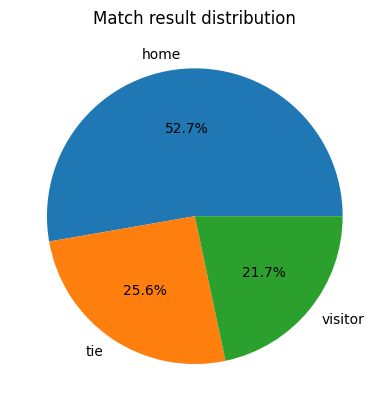

In [3]:
df["result"] = None
df["goals_home"] = df["score"].str.split(":").str[0]
df["goals_away"] = df["score"].str.split(":").str[1]
df.loc[df["goals_home"] > df["goals_away"], "result"] = "home"
df.loc[df["goals_home"] == df["goals_away"], "result"] = "tie"
df.loc[df["goals_home"] < df["goals_away"], "result"] = "visitor"
genre_counts = df["result"].value_counts()
genre_counts

plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Match result distribution")
plt.show()

### Exercise 2

##### What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division. What have been the biggest wins? Of course, when we say biggest we mean those with the highest goal difference. Show the top ten of them in a table.

To focus on matches played in 1st division, we filter the data creating the datafram "df_divison1" to work with, which contains matches that have been played from 1st division only. We also drop the rows with None values in score in order to work with the goals columns as integer values, which will be necessary to obtain the goal difference in each match.

In [4]:
df_division1 = df.loc[df["division"] == 1].dropna(subset=["score"])
df_division1["goals_home"] = df_division1["goals_home"].astype(int)
df_division1["goals_away"] = df_division1["goals_away"].astype(int)
df_division1

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_away
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,home,3,2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,home,5,0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,tie,1,1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,visitor,0,2
...,...,...,...,...,...,...,...,...,...,...,...
47963,2021-2022,1,3,8/28/21,10:00 PM,Real Betis,Real Madrid,0:1,visitor,0,1
47964,2021-2022,1,3,8/29/21,5:00 PM,Barcelona,Getafe,2:1,home,2,1
47965,2021-2022,1,3,8/29/21,7:30 PM,Cádiz CF,CA Osasuna,2:3,visitor,2,3
47966,2021-2022,1,3,8/29/21,7:30 PM,Rayo Vallecano,Granada CF,4:0,home,4,0


In [5]:
df_home = df_division1.groupby("home_team")
df_away = df_division1.groupby("away_team")

goals = df_home["goals_home"].sum() + df_away["goals_away"].sum()
scored_goals = goals.sort_values(ascending = False).head(10)
goals = df_away["goals_home"].sum() + df_home["goals_away"].sum()
conceded_goals = goals.sort_values(ascending = False).head(10)

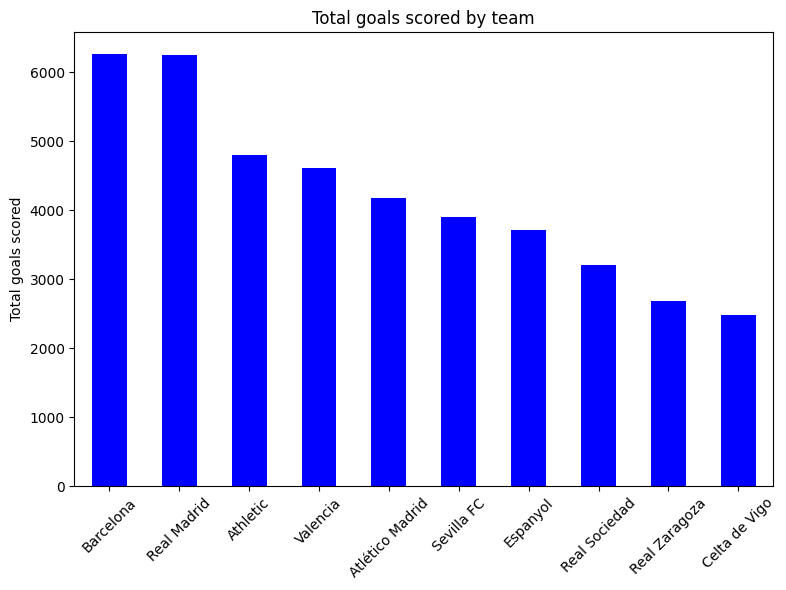

In [6]:
plt.figure(figsize=(8, 6))
scored_goals.plot(kind='bar', color='blue')
plt.xlabel('')
plt.ylabel('Total goals scored')
plt.title('Total goals scored by team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

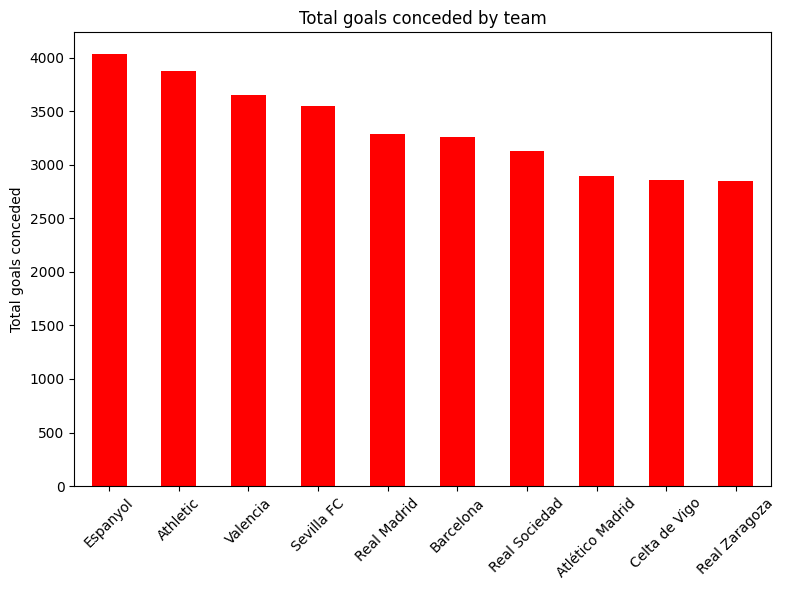

In [7]:
plt.figure(figsize=(8, 6))
conceded_goals.plot(kind='bar', color='red')
plt.xlabel('')
plt.ylabel('Total goals conceded')
plt.title('Total goals conceded by team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df_division1["difference"] = abs(df_division1["goals_home"] - df_division1["goals_away"])
biggest_wins = df_division1.sort_values("difference", ascending=False).head(10)
biggest_wins

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_away,difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,home,12,1,11
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,home,11,1,10
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,home,10,0,10
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,home,10,0,10
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,home,10,0,10
3629,1953-1954,1,26,3/28/54,None,Barcelona,Real Oviedo,9:0,home,9,0,9
10024,1978-1979,1,16,1/14/79,None,Barcelona,Rayo Vallecano,9:0,home,9,0,9
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,home,9,0,9
5027,1959-1960,1,21,2/7/60,None,Real Madrid,Elche CF,11:2,visitor,11,2,9
3911,1955-1956,1,1,9/11/55,None,Atlético Madrid,Hércules CF,9:0,home,9,0,9


### Exercise 3

##### There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.

First we change the format of the date column to datetime format. As there are dates that go from 1929 to 2000, it is necessary to apply a function to subtract 100 years after using to_datetime transformation, as it will give dates with years higher than the actual year, which doesn't make any sense.

In [9]:
df["date"] = pd.to_datetime(df["date"], format ="%m/%d/%y")
df['date'] = df['date'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2025 else x)

We count the number of matches by day and do a bar plot. Also we create a new dataframe to work with the time column, in which we transform the format of the hours to 00:00 and then we count the matches by hour, eliminating nan values previously. Finally, we do an histogram with the relative frequency for each hour.

In [10]:
weekday_counts = df["date"].dt.day_name().value_counts()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(weekday_order)
weekday_counts

date
Monday         588
Tuesday        324
Wednesday     1367
Thursday       403
Friday         648
Saturday      9413
Sunday       36037
Name: count, dtype: int64

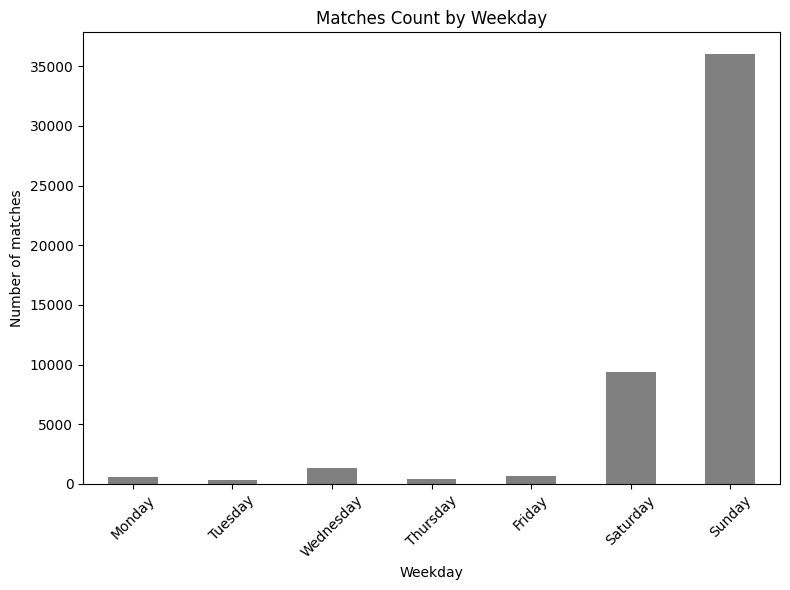

In [11]:
plt.figure(figsize=(8, 6))
weekday_counts.plot(kind='bar', color='grey')
plt.xlabel('Weekday')
plt.ylabel('Number of matches')
plt.title('Matches Count by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df_time = df.copy()
df_time["time"] = pd.to_datetime(df_time["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")
hour_counts = df_time["time"].dropna().value_counts()
hour_counts = hour_counts.sort_index()
hours = hour_counts.index
counts = hour_counts.values
total_count = counts.sum()
relative_frequency = (counts / total_count) * 100


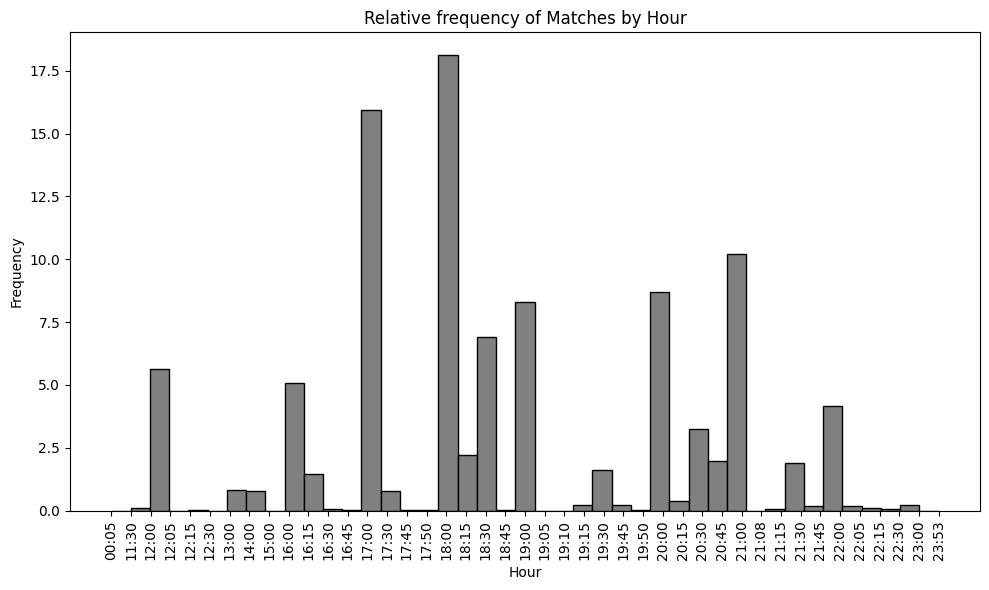

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(hours, bins=len(hours), weights=relative_frequency, color='grey', edgecolor='black')
plt.title('Relative frequency of Matches by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

Two functions are created, one two plot the weekday count bar and another to plot the matchday count histogram. Both of them take season as a parameter.

In [14]:
def plot_weekday_bar(season):

    df_season = df.loc[df["season"] == season]
    weekday_counts = df_season["date"].dt.day_name().value_counts()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = weekday_counts.reindex(weekday_order)
    weekday_counts

    plt.figure(figsize=(6, 5))
    weekday_counts.plot(kind='bar', color='grey')
    plt.xlabel('Weekday')
    plt.ylabel('Number of matches')
    plt.title('Matches Count by Weekday')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
def plot_matchtime_hist(season):
    
    df_season = df.loc[df["season"] == season]
    df_season["time"] = pd.to_datetime(df_season["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")
    hour_counts = df_season["time"].dropna().value_counts()
    hour_counts = hour_counts.sort_index()
    hours = hour_counts.index
    counts = hour_counts.values
    total_count = counts.sum()
    relative_frequency = (counts / total_count) * 100
    
    plt.figure(figsize=(10, 5))
    plt.hist(hours, bins=len(hours), weights=relative_frequency, color='grey', edgecolor='black')
    plt.title('Relative frequency of Matches by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()
    plt.show()

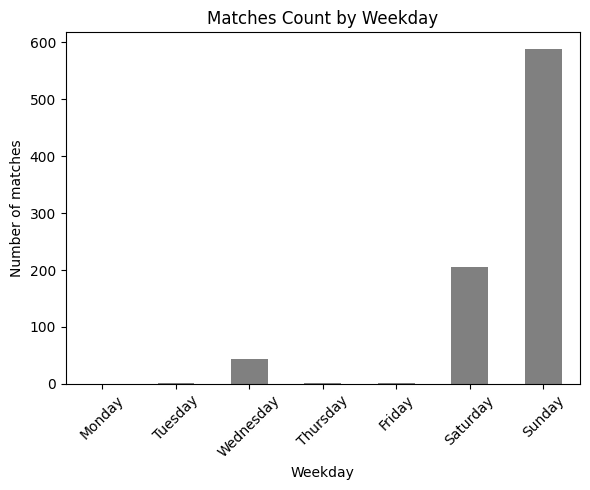

In [16]:
plot_weekday_bar("2000-2001")

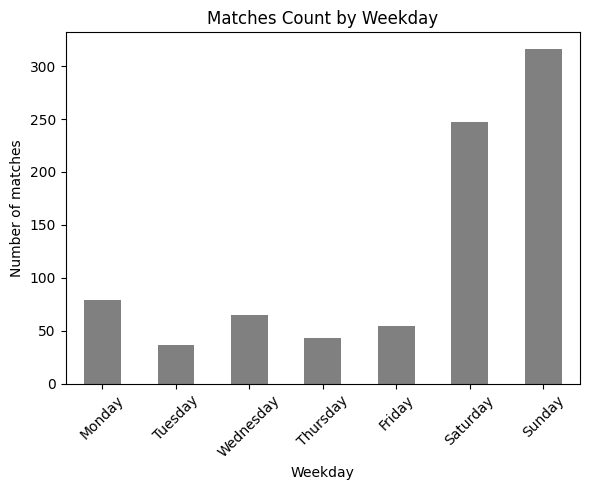

In [17]:
plot_weekday_bar("2020-2021")

/tmp/ipykernel_1182/3266519328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season["time"] = pd.to_datetime(df_season["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")


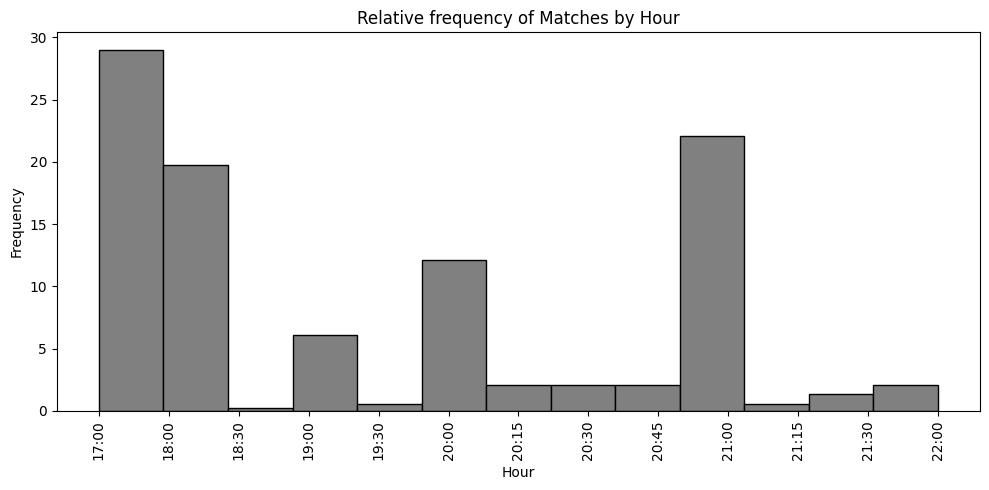

In [18]:
plot_matchtime_hist("2000-2001")

/tmp/ipykernel_1182/3266519328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season["time"] = pd.to_datetime(df_season["time"], format = "%I:%M %p", errors = "coerce").dt.strftime("%H:%M")


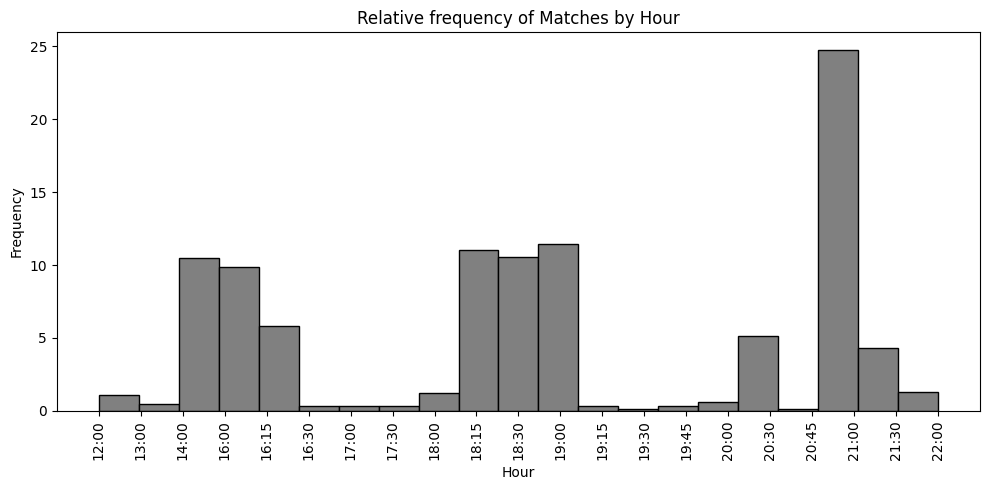

In [19]:
plot_matchtime_hist("2020-2021")

### Exercise 4

##### Build a cross results table for season 2020-2021 (1st division). Figure 1 is an example taken from Wikipedia. Try to make it the most similar to this one, painting the background of each cell according to result (green in case local team wins and red in case visitor team wins). Also, could you model the intensity of this background color with the goal difference from the match?

We create a dataframe that contains only the season 2020-2021 and the first division. We create a crosstab and a function to model the colors of the cell.

In [21]:
df_crosstab = df.loc[(df["season"] == "2020-2021") & (df["division"] == 1)]
crosstab = pd.crosstab(index = df_crosstab["home_team"], columns = df_crosstab["away_team"], 
                       values = df_crosstab["score"].str.replace(":", "-"),
                       aggfunc = lambda x: " ".join(x)).fillna("—")
crosstab

away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,—,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,—,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,—,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,—,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,—,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,—,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,—,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,—,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,—,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


In [22]:
def color_cells(value):
    if value != '—':
        home_score, away_score = map(int, value.split('-'))
        if home_score > away_score:
            return 'background-color: lightgreen'
        elif home_score < away_score:
            return 'background-color: salmon'
        else:
            return 'background-color: yellow'
    return ''

In [23]:
styled_crosstab = crosstab.style.applymap(color_cells)
styled_crosstab

/tmp/ipykernel_1182/709934697.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab = crosstab.style.applymap(color_cells)


away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,—,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,—,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,—,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,—,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,—,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,—,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,—,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,—,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,—,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


It is possible to model the color intensity of the cells based on the goal difference. For that purpose, we need to obtain the goal difference for each match. Then, we create a function that does the modification of the color cells using hexadecimal color format.

In [25]:
df_crosstab["goals_home"] = df_crosstab["goals_home"].astype(int)
df_crosstab["goals_away"] = df_crosstab["goals_away"].astype(int)
df_crosstab["difference"] = df_crosstab["goals_home"]-df_crosstab["goals_away"]

/tmp/ipykernel_1182/3351538052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crosstab["goals_home"] = df_crosstab["goals_home"].astype(int)
/tmp/ipykernel_1182/3351538052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crosstab["goals_away"] = df_crosstab["goals_away"].astype(int)
/tmp/ipykernel_1182/3351538052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [58]:
def intensity(value):
    return (abs(max(df_crosstab['difference']-value)/max(df_crosstab['difference'])*0.75+0.25))

def format_color(value):
    
    def intensifier(original_color, intensity):     
    
        r = int(original_color[1:3], 16)
        g = int(original_color[3:5], 16)
        b = int(original_color[5:7], 16)
    
        new_r = int(r * intensity)
        new_g = int(g * intensity)
        new_b = int(b * intensity)
    
        new_color = f"#{new_r:02X}{new_g:02X}{new_b:02X}"
        return new_color
    
    original_style ='border: 1px solid black; text-align: center; background-color: #FFCCCC'
    if value != '—':
        elements = value.split("-")
        diff = int(elements[0]) - int(elements[1])
        new_background_color='#FFFFCC'
    
        if diff > 0:
            
            new_background_color=intensifier('#D1FF33',intensity(diff))
            updated_style = original_style.replace('#FFCCCC', new_background_color) 
            return  updated_style
        if diff < 0:
            diff=abs(diff)
            new_background_color=intensifier('#FF4F33 ',intensity(diff))
            updated_style = original_style.replace('#FFCCCC', new_background_color) 
            return  updated_style
        else:
            return 'border: 1px solid black; text-align: center; background-color: #F9FF33'  # Yellow
    else:
        return 'border: 1px solid black; text-align: center; background-color: white'
    

In [59]:
styled_crosstab2 = crosstab.style.applymap(format_color)
styled_crosstab2

/tmp/ipykernel_1182/504273745.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab2 = crosstab.style.applymap(format_color)


away_team,Alavés,Athletic,Atlético Madrid,Barcelona,CA Osasuna,Celta de Vigo,Cádiz CF,Elche CF,Getafe,Granada CF,Levante,Real Betis,Real Madrid,Real Sociedad,Real Valladolid,SD Eibar,SD Huesca,Sevilla FC,Valencia,Villarreal
home_team,,,,,,,,,,,,,,,,,,,,
Alavés,—,1-0,1-2,1-1,0-1,1-3,1-1,0-2,0-0,4-2,2-2,0-1,1-4,0-0,1-0,2-1,1-0,1-2,2-2,2-1
Athletic,0-0,—,2-1,2-3,2-2,0-2,0-1,1-0,5-1,2-1,2-0,4-0,0-1,0-1,2-2,1-1,2-0,2-1,1-1,1-1
Atlético Madrid,1-0,2-1,—,1-0,2-1,2-2,4-0,3-1,1-0,6-1,0-2,2-0,1-1,2-1,2-0,5-0,2-0,2-0,3-1,0-0
Barcelona,5-1,2-1,0-0,—,4-0,1-2,1-1,3-0,5-2,1-2,1-0,5-2,1-3,2-1,1-0,1-1,4-1,1-1,2-2,4-0
CA Osasuna,1-1,1-0,1-3,0-2,—,2-0,3-2,2-0,0-0,3-1,1-3,0-2,0-0,0-1,0-0,2-1,1-1,0-2,3-1,1-3
Celta de Vigo,2-0,0-0,0-2,0-3,2-1,—,4-0,3-1,1-0,3-1,2-0,2-3,1-3,1-4,1-1,1-1,2-1,3-4,2-1,0-4
Cádiz CF,3-1,0-4,2-4,2-1,0-2,0-0,—,1-3,0-2,1-1,2-2,0-1,0-3,0-1,0-0,1-0,2-1,1-3,2-1,0-0
Elche CF,0-2,2-0,0-1,0-2,2-2,1-1,1-1,—,1-3,0-1,1-0,1-1,1-1,0-3,1-1,1-0,0-0,2-1,2-1,2-2
Getafe,0-0,1-1,0-0,1-0,1-0,1-1,0-1,1-1,—,0-1,2-1,3-0,0-0,0-1,0-1,0-1,1-0,0-1,3-0,1-3


We can create a function to plot a cross result table. This function has season and division as parameters

In [60]:
def plot_cross_results_table(season, division):
    df_crosstab = df.loc[(df["division"] == division) & (df["season"] == season)]
    crosstab = pd.crosstab(index = df_crosstab["home_team"], columns = df_crosstab["away_team"], values = df_crosstab["score"].str.replace(":", "-"), 
                       aggfunc = lambda x: " ".join(x)).fillna("—")
    styled_crosstab = crosstab.style.applymap(color_cells) 
    return styled_crosstab
    

In [61]:
plot_cross_results_table("2020-2021", 2)

/tmp/ipykernel_1182/3035069410.py:5: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_crosstab = crosstab.style.applymap(color_cells)


away_team,Albacete,Alcorcón,CD Castellón,CD Leganés,CD Lugo,CD Mirandés,CD Tenerife,CE Sabadell,CF Fuenlabrada,Espanyol,FC Cartagena,Girona,Málaga CF,Ponferradina,RCD Mallorca,Rayo Vallecano,Real Oviedo,Real Zaragoza,Sporting Gijón,UD Almería,UD Las Palmas,UD Logroñés
home_team,,,,,,,,,,,,,,,,,,,,,,
Albacete,—,0-1,0-1,0-0,1-1,1-0,0-2,3-0,1-2,0-3,2-0,0-2,1-1,0-2,0-1,2-1,1-1,1-0,0-1,1-2,1-1,1-1
Alcorcón,1-2,—,2-1,1-2,1-0,4-0,2-0,2-0,0-3,1-0,2-1,1-0,0-1,0-1,0-2,0-3,1-1,0-3,1-2,0-1,0-0,1-0
CD Castellón,3-0,0-2,—,2-0,0-1,0-1,0-1,2-1,1-2,1-3,2-1,0-1,0-1,0-2,1-0,0-2,1-0,1-0,2-0,1-2,4-0,0-0
CD Leganés,3-1,1-0,0-0,—,3-2,1-0,1-0,2-1,0-2,2-0,3-1,0-1,1-0,1-1,0-1,1-0,2-1,1-0,0-0,2-1,1-0,3-0
CD Lugo,1-0,1-3,0-0,2-1,—,2-1,2-0,0-1,0-0,1-1,2-1,3-0,0-1,1-0,0-1,1-0,0-0,2-2,0-0,0-2,1-1,1-1
CD Mirandés,0-2,0-0,1-1,0-0,0-0,—,0-0,0-2,2-1,2-2,4-1,3-3,1-0,0-1,0-0,0-2,1-1,1-0,1-0,1-1,2-0,0-1
CD Tenerife,2-0,3-1,1-1,0-0,1-1,1-2,—,1-2,1-1,0-0,3-0,2-0,2-0,1-0,0-1,1-0,2-2,1-0,1-0,0-1,1-1,0-1
CE Sabadell,0-0,1-1,1-1,1-0,1-1,0-2,0-2,—,1-2,0-1,1-1,2-2,1-2,2-0,1-0,2-0,0-1,1-1,1-1,1-2,3-1,0-0
CF Fuenlabrada,1-0,0-0,1-1,0-0,2-0,0-1,1-1,2-2,—,1-1,2-1,1-1,0-2,1-1,4-1,1-2,2-2,0-1,0-0,1-1,1-2,0-0


### Exercise 5

##### As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? Show both things in two pie charts, side by side Remember to consider ties in the first one.a.

##### Write a function that, given two team names, plots the two graphs described above. Function prototype should be like plot_direct_confrontations_stats(team1, team2) and return the plot object. Use it with some other classical rivals like Betis and Sevilla.

To know which team has won the most games, it is necessary first to create a dataframe that only contains the matches between Real Madrid and Barcelona. Then we will store in a column the name of the team winner of the match or tie if it is a tie.

In [76]:
df5 = df.dropna(subset="score")
df5["goals_home"] = df5["goals_home"].astype("Int64")
df5["goals_away"] = df5["goals_away"].astype("Int64")
df_RMA_FCB = df5[(df5['home_team'].isin(['Real Madrid', 'Barcelona'])) & (df5['away_team'].isin(['Real Madrid', 'Barcelona']))]

home_scores, away_scores = zip(*df_RMA_FCB['score'].str.split(':').apply(lambda x: (int(x[0]), int(x[1]))))
df_RMA_FCB["winner"] = np.where(np.array(home_scores) > np.array(away_scores), df_RMA_FCB['home_team'], 
            np.where(np.array(home_scores) < np.array(away_scores), df_RMA_FCB['away_team'], 'Tie'))

df_RMA_FCB

/tmp/ipykernel_1182/2243178903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["goals_home"] = df5["goals_home"].astype("Int64")
/tmp/ipykernel_1182/2243178903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["goals_away"] = df5["goals_away"].astype("Int64")
/tmp/ipykernel_1182/2243178903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_away,winner
5,1928-1929,1,2,1929-02-17,None,Barcelona,Real Madrid,1:2,visitor,1,2,Real Madrid
53,1928-1929,1,11,1929-05-09,None,Real Madrid,Barcelona,0:1,visitor,0,1,Barcelona
131,1929-1930,1,9,1930-01-26,None,Barcelona,Real Madrid,1:4,visitor,1,4,Real Madrid
176,1929-1930,1,18,1930-03-30,None,Real Madrid,Barcelona,5:1,home,5,1,Real Madrid
221,1930-1931,1,9,1931-02-01,None,Real Madrid,Barcelona,0:0,tie,0,0,Tie
...,...,...,...,...,...,...,...,...,...,...,...,...
24932,2018-2019,1,26,2019-03-02,8:45 PM,Real Madrid,Barcelona,0:1,visitor,0,1,Barcelona
25157,2019-2020,1,10,2019-12-18,8:00 PM,Barcelona,Real Madrid,0:0,tie,0,0,Tie
25317,2019-2020,1,26,2020-03-01,9:00 PM,Real Madrid,Barcelona,2:0,home,2,0,Real Madrid
25499,2020-2021,1,7,2020-10-24,4:00 PM,Barcelona,Real Madrid,1:3,visitor,1,3,Real Madrid


We count the number of matches win by each team and the number of times, we store the goals of both teams in two variables. Then we do the two plots required.

In [77]:
winners_count = df_RMA_FCB["winner"].value_counts()
homegoals_count = df_RMA_FCB.groupby("home_team")["goals_home"].sum()
visitorgoals_count = df_RMA_FCB.groupby("away_team")["goals_away"].sum()
barcelona_goals = homegoals_count["Barcelona"] + visitorgoals_count["Barcelona"]
realmadrid_goals = homegoals_count["Real Madrid"] + visitorgoals_count["Real Madrid"] 

In [78]:
result = ['Real Madrid', 'Barcelona', 'Tie']
win_counts = [winners_count['Real Madrid'], winners_count['Barcelona'], winners_count['Tie']]
goals = [realmadrid_goals, barcelona_goals]

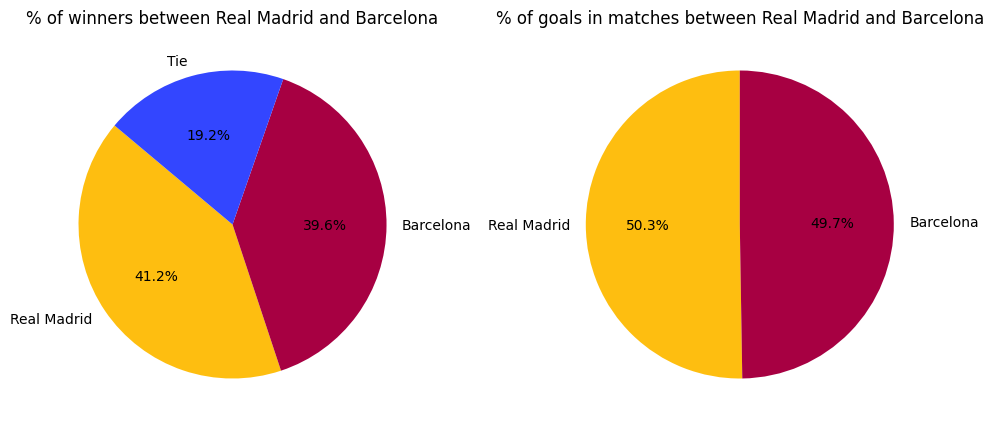

In [79]:
# Plotting the pie chart for match outcomes (Real Madrid Wins, Barcelona Wins, Ties)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
colors_hex = ['#FEBE10', '#A70042', '#3346FF']
plt.pie(win_counts, labels=result, autopct='%1.1f%%', startangle=140, colors=colors_hex)
plt.title('% of winners between Real Madrid and Barcelona')

# Plotting the pie chart for total goals (Real Madrid, Barcelona)
plt.subplot(1, 2, 2)
plt.pie(goals, labels=['Real Madrid', 'Barcelona'], autopct='%1.1f%%', startangle=90, colors=['#FEBE10', '#A70042'])
plt.title('% of goals in matches between Real Madrid and Barcelona')
plt.show()

In [82]:
def plot_direct_confrontations_stats(team1, team2):
    
    teams = [team1, team2]
    df_teams = df5[(df5['home_team'].isin(teams)) & (df5['away_team'].isin(teams))]
    home_scores, away_scores = zip(*df_teams['score'].str.split(':').apply(lambda x: (int(x[0]), int(x[1]))))
    df_teams["winner"] = np.where(np.array(home_scores) > np.array(away_scores), df_teams['home_team'], 
            np.where(np.array(home_scores) < np.array(away_scores), df_teams['away_team'], 'Tie'))
    
    homegoals_count = df_teams.groupby("home_team")["goals_home"].sum()
    visitorgoals_count = df_teams.groupby("away_team")["goals_away"].sum()
    team1_goals = homegoals_count[team1] + visitorgoals_count[team1]
    team2_goals = homegoals_count[team2] + visitorgoals_count[team2]
    winners_count = df_teams["winner"].value_counts()
    
    result = [team1, team2, "Tie"]
    win_counts = [winners_count[team1], winners_count[team2], winners_count['Tie']]
    goals = [team1_goals, team2_goals]
    
    fig, axes = plt.subplots(figsize=(12, 5), ncols=2)
    axes[0].pie(win_counts, labels=result, autopct='%1.1f%%', startangle=140, colors=['#F43333', '#0BB363', '#3346FF'])
    axes[0].set_title(f"% of winners between {team1} and {team2}")

    axes[1].pie(goals, labels=[team1, team2], autopct='%1.1f%%', startangle=90, colors=['#F43333', '#0BB363'])
    axes[1].set_title(f"% of goals in matches between {team1} and {team2}")

    plt.tight_layout()

/tmp/ipykernel_1182/747485756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams["winner"] = np.where(np.array(home_scores) > np.array(away_scores), df_teams['home_team'],


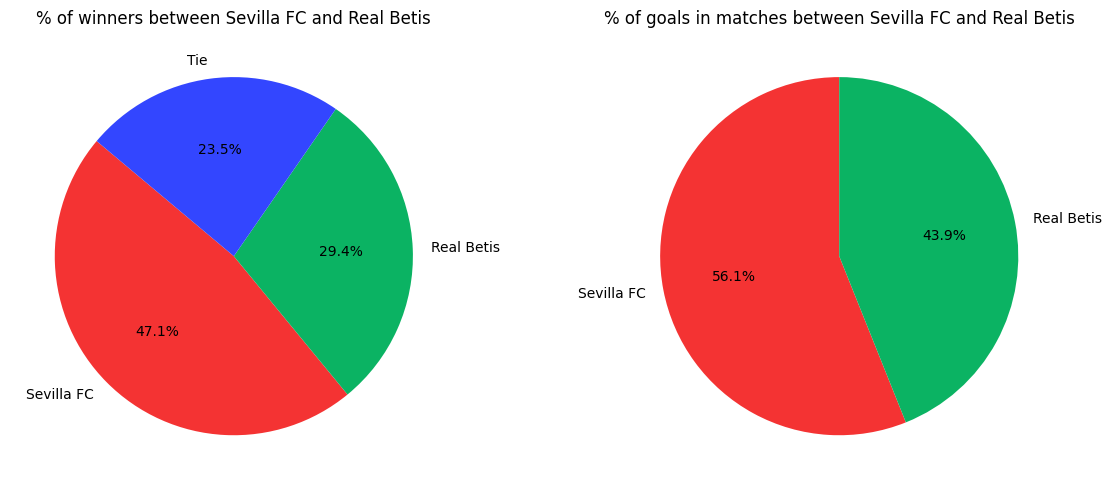

In [83]:
plot_direct_confrontations_stats("Sevilla FC", "Real Betis")

### Exercise 6

##### Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games without losing. That was, by far, the longest undefeated streak in their history. Which teams have had the longest undefeated streaks? Show the longest undefeated streaks in a horizontal bar plot, indicating in each bar the team name and the dates it held that streak, for instance, Real Sociedad 22/04/1979 - 04/05/1980.

We proceed the same way as before, creating a new dataframe from df5 of exercise 5 and saving the winners of the matches in a column.

In [84]:
df6 = df5.copy()
df6["team_winner"] = np.where(df6["goals_home"] > df6["goals_away"], df6['home_team'], 
            np.where(df6["goals_home"] < df6["goals_away"], df6['away_team'], 'Tie'))
df6

,season,division,matchday,date,time,home_team,away_team,score,result,goals_home,goals_away,team_winner
0,1928-1929,1,1,1929-02-10,None,Arenas Club,Athletic Madrid,2:3,visitor,2,3,Athletic Madrid
1,1928-1929,1,1,1929-02-10,None,Espanyol,Real Unión,3:2,home,3,2,Espanyol
2,1928-1929,1,1,1929-02-10,None,Real Madrid,Catalunya,5:0,home,5,0,Real Madrid
3,1928-1929,1,1,1929-02-10,None,Donostia,Athletic,1:1,tie,1,1,Tie
4,1928-1929,1,1,1929-02-12,None,Racing,Barcelona,0:2,visitor,0,2,Barcelona
...,...,...,...,...,...,...,...,...,...,...,...,...
48345,2021-2022,2,3,2021-08-28,10:00 PM,Ponferradina,Girona,2:1,home,2,1,Ponferradina
48346,2021-2022,2,3,2021-08-29,5:00 PM,SD Amorebieta,UD Almería,2:1,home,2,1,SD Amorebieta
48347,2021-2022,2,3,2021-08-29,7:30 PM,CD Lugo,Real Valladolid,0:2,visitor,0,2,Real Valladolid
48348,2021-2022,2,3,2021-08-29,7:30 PM,Real Sociedad B,CF Fuenlabrada,0:0,tie,0,0,Tie


We create two dataframes that store both the home teams and the away teams and then concatenate it in a combined dataframe. In this dataframe we create a column named undefeated to store if a team looses(0) or not(1). In a column named streak the streaks of each team are saved.

In [85]:
home_df = df6[['date','home_team', 'team_winner']].rename(columns={'home_team': 'team'})
away_df = df6[['date', 'away_team', 'team_winner']].rename(columns={'away_team': 'team'})
combined_df = pd.concat([home_df, away_df])
combined_df.sort_values(by=['team','date'], inplace=True)

In [86]:
combined_df['undefeated'] = combined_df.apply(lambda row: 1 if row['team'] == row['team_winner'] or row['team_winner'] == 'Tie' else 0, axis=1)
combined_df.reset_index(drop=True, inplace=True)
mask = combined_df['undefeated'] == 1
combined_df['streak'] = mask.groupby([(~mask).cumsum(), combined_df['team']]).cumsum()

In the combined_df dataframe we obtain the maximum streak of each team and the initial and end dates of each team using indexes. The top 10 streak by team will be save as a dataframe

In [87]:
streak_value = combined_df.groupby("team")['streak'].max()
max_indexes = combined_df.groupby('team')['streak'].idxmax()
min_indexes = max_indexes - (streak_value)
end_date = combined_df.loc[max_indexes, "date"]
initial_date = combined_df.loc[min_indexes, "date"]

In [88]:
streak_df = pd.DataFrame(streak_value)
streak_df["initial_date"] = initial_date.values
streak_df["end_date"] = end_date.values

streak_df.sort_values(by="streak", inplace=True, ascending=False)
top_streak = streak_df.head(10)
top_streak

,streak,initial_date,end_date
team,,,
Barcelona,43,2017-04-08,2018-05-09
Real Sociedad,38,1979-04-22,1980-05-04
Real Madrid,31,1988-04-30,1989-04-09
Real Valladolid,29,2006-10-01,2007-04-29
Atlético Madrid,26,2020-02-01,2020-12-05
Sporting Gijón,25,2014-05-03,2015-01-11
Dep. La Coruña,22,1994-02-26,1994-11-06
Espanyol,22,1993-10-07,1994-03-13
Valencia,21,1942-01-04,1942-11-22


The top 10 streaks will be plotted in an horizontal bar plot, with the initial and end dates written for each team.

In [93]:
# Extract necessary data for plotting
teams = top_streak.index
streaks = top_streak['streak']
start_dates = top_streak['initial_date']
end_dates = top_streak['end_date']

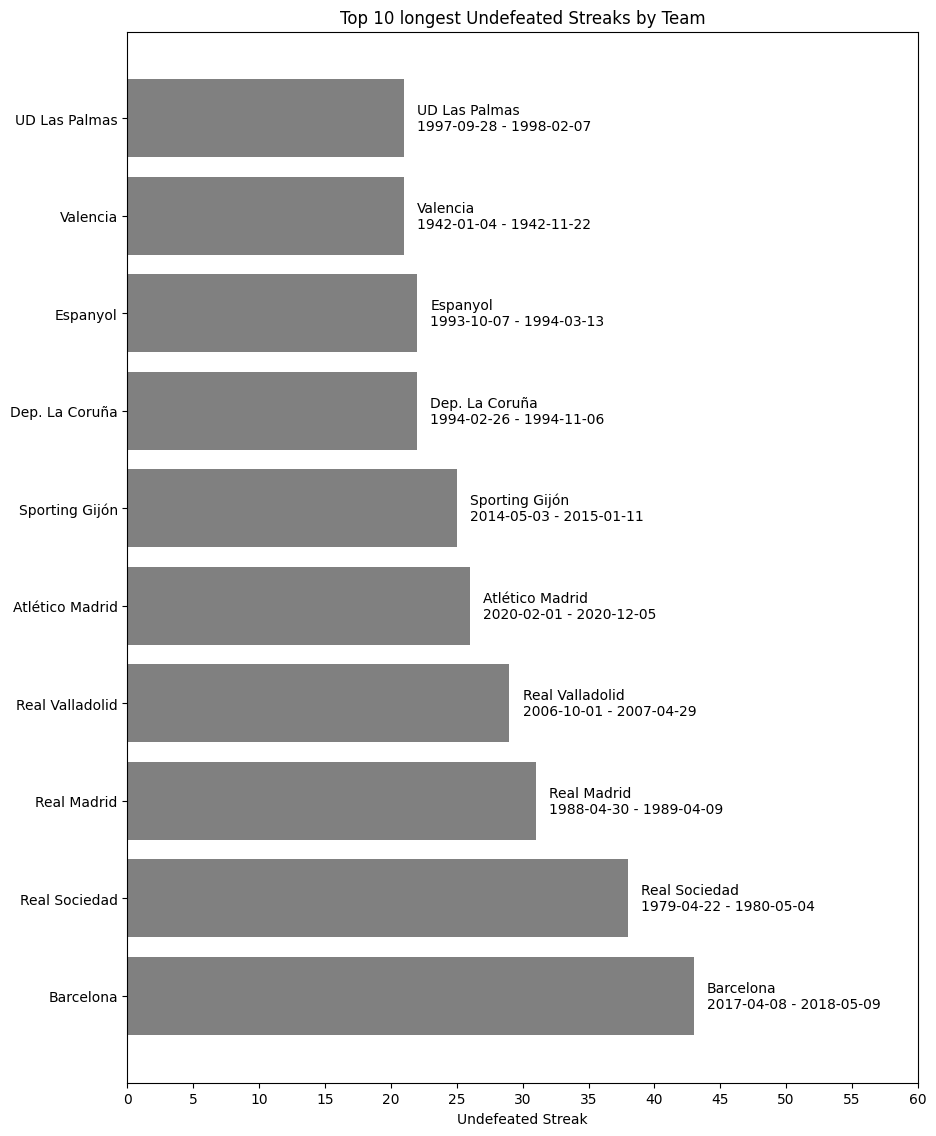

In [94]:
plt.figure(figsize=(10, 12))
plt.barh(teams, streaks, color='grey')
plt.xlabel('Undefeated Streak')
plt.xlim(0, 60)
plt.title('Top 10 longest Undefeated Streaks by Team')
x_ticks = list(range(0, 61, 5))  
plt.xticks(x_ticks)

# Annotate the bars with start and end dates
for i, (team, streak, start_date, end_date) in enumerate(zip(teams, streaks, start_dates, end_dates)):
    start_date = start_date.strftime('%Y-%m-%d')  # Format start date
    end_date = end_date.strftime('%Y-%m-%d') 
    plt.text(streak + 1, i, f'{team}\n{start_date} - {end_date}', va='center', ha= "left", fontsize=10)
    
plt.tight_layout(pad=3)

plt.show()

### Exercise 7

##### Create a table with the final standings of each season (and division), that is, a table that contains all the teams ordered (in descending order) by the number of points they got during that season, and some other aggregate statistics. The table must contain the following columns: season, division, ranking, team, GF (total goals scored), GA (total goals conceded), GD (goals difference), W (total wins), L (total loses), T (total ties), Pts (points). Remember that, in football, you earn 3 points per victory, and 1 point per tie (none for loses). In case two teams have same number of points, order by GD (descending), and then by GF (also descending). Order the table so that standings of one season come before standings of previous one, and standings of 1st division come before standings of 2nd division.

We group the data from the matches of each season, division and team to obtain the columns of the ranking of each season and division.

In [162]:
df_ranking = df[df["season"] != "2021-2022"]

df_ranking = df_ranking.copy()
df_ranking["goals_home"] = df_ranking["goals_home"].astype(int)
df_ranking["goals_away"] = df_ranking["goals_away"].astype(int)

points_home = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "home_team"])["result"].count() * 3
points_home.index = points_home.index.set_names("team", level="home_team")
points_tie1 = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "home_team"])["result"].count()
points_tie1.index = points_tie1.index.set_names("team", level="home_team")
points_tie2 = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "away_team"])["result"].count()
points_tie2.index = points_tie2.index.set_names("team", level="away_team")
points_visitor = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "away_team"])["result"].count() * 3
points_visitor.index = points_visitor.index.set_names("team", level="away_team")
points = points_home.add(points_tie1, fill_value=0).add(points_tie2, fill_value=0).add(points_visitor, fill_value=0).astype(int)

loss_home = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "home_team"])["result"].count()
loss_home.index = loss_home.index.set_names("team", level="home_team")
loss_visitor = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "away_team"])["result"].count()
loss_visitor.index = loss_visitor.index.set_names("team", level="away_team")
loss = loss_home.add(loss_visitor, fill_value=0).astype(int)

win_home = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "home_team"])["result"].count()
win_home.index = win_home.index.set_names("team", level="home_team")
win_visitor = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "away_team"])["result"].count()
win_visitor.index = win_visitor.index.set_names("team", level="away_team")
win = win_home.add(win_visitor, fill_value=0).astype(int)

tie_home = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "home_team"])["result"].count()
tie_home.index = tie_home.index.set_names("team", level="home_team")
tie_visitor = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "away_team"])["result"].count()
tie_visitor.index = tie_visitor.index.set_names("team", level="away_team")
tie = tie_home.add(tie_visitor, fill_value=0)

goals_home = df_ranking.groupby(["season", "division", "home_team"])["goals_home"].sum()
goals_visitor = df_ranking.groupby(["season", "division", "away_team"])["goals_away"].sum()
GF = goals_home.add(goals_visitor, fill_value=0)
GF.index = GF.index.set_names("team", level="home_team")

goals_home = df_ranking.groupby(["season", "division", "home_team"])["goals_away"].sum()
goals_visitor = df_ranking.groupby(["season", "division", "away_team"])["goals_home"].sum()
GA = goals_home.add(goals_visitor, fill_value=0)
GA.index = GA.index.set_names("team", level="home_team")

GD = GF - GA

df_result = pd.DataFrame({
    "GF": GF,
    "GA": GA,
    "GD": GD,
    "W": win,
    "L": loss,
    "T": tie,
    "Pts": points
}).reset_index()

def add_ranking(df):
    df.insert(2, "rank", df["Pts"].rank(ascending=False, method="first"))
    return df
df_result = df_result.reset_index(drop=True).sort_values(["Pts", "GD", "GF"], ascending=[False, False, False]).reset_index(drop=True)
df_result = df_result.groupby(["season", "division"]).apply(add_ranking).reset_index(drop=True).sort_values(["season", "division"], ascending=[False, True]).reset_index(drop=True)

df_result

,season,division,rank,team,GF,GA,GD,W,L,T,Pts
0,2020-2021,1,1.0,Atlético Madrid,67,25,42,26.0,4.0,8.0,86.0
1,2020-2021,1,2.0,Real Madrid,67,28,39,25.0,4.0,9.0,84.0
2,2020-2021,1,3.0,Barcelona,85,38,47,24.0,7.0,7.0,79.0
3,2020-2021,1,4.0,Sevilla FC,53,33,20,24.0,9.0,5.0,77.0
4,2020-2021,1,5.0,Real Sociedad,59,38,21,17.0,10.0,11.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...
2739,1928-1929,1,6.0,Athletic Madrid,43,41,2,8.0,8.0,2.0,26.0
2740,1928-1929,1,7.0,Espanyol,32,38,-6,7.0,7.0,4.0,25.0
2741,1928-1929,1,8.0,Catalunya,45,49,-4,6.0,8.0,4.0,22.0
2742,1928-1929,1,9.0,Real Unión,40,42,-2,5.0,11.0,2.0,17.0


### Exercise 8


##### Villarreal is a team that has grown a lot in recent decades. Specially ever since some billionaire guy bought it (Fernando Roig, from Mercadona). Make a line plot showing the rank of Villarreal at the end of each season, from the oldest ones (left) to the earliest ones (right). Consider rankings in 2nd division to be a continuation of the 1st one, that is, if there’s N teams in 1st division and Villarreal got r position in 2nd division, then it should be placed in N + r. Draw in the same plot a line showing the cut between 1st and 2nd division. Write a function that, given n team names, plots the graph described above of each one of them superposed. Function prototype should be like plot_- ranking_evolution(team1, team2, ..., teamN) and return the plot object (note that function should not take one array-type argument, but n arguments). Use it to compare the evolution of all the teams that currentlyplay in 1st division.

We create a dataframe which contains all the classifications of the Villarreal.

In [163]:
villarreal_df = df_result[df_result['team'] == 'Villarreal'][['season', 'rank', "division"]].sort_values("season")

novillarreal_seasons = df_result[~df_result["season"].isin(villarreal_df["season"])].sort_values("season")["season"].unique()
villarreal_seasons = villarreal_df["season"].unique()
allseasons = df_result.sort_values("season")["season"].unique()

In [164]:
seasons2 = villarreal_df.loc[villarreal_df["division"] == 2]["season"].values
teams_count = df_result.loc[df_result["division"] == 1]["season"].value_counts()[villarreal_df.loc[villarreal_df["division"] == 2]["season"].values]

for season in seasons2:
    villarreal_df.loc[villarreal_df["season"] == season, "rank"] = villarreal_df.loc[villarreal_df["season"] == season, "rank"] + teams_count[season]

teams1 = df_result.loc[df_result["division"] == 1]["season"].value_counts().sort_index()

df_temporadas_adicionales = pd.DataFrame({'season': novillarreal_seasons})
villarreal_df = pd.concat([villarreal_df, df_temporadas_adicionales], ignore_index=True)

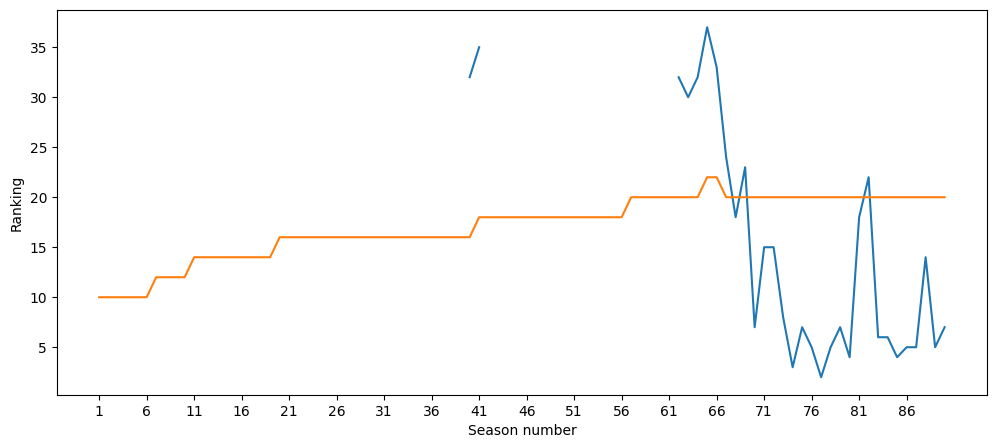

In [165]:
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(1,len(allseasons)+1, 5))
plt.xlabel("Season number")
plt.ylabel("Ranking")
plt.plot(np.arange(0,len(allseasons))+1, villarreal_df.sort_values("season")["rank"].values)
plt.plot(np.arange(0,len(allseasons))+1, teams1.values)
plt.show()

In [166]:
def ranking_evolution(*teams):

    teams = [team for arg in teams for team in (arg if isinstance(arg, list) else [arg])]
    allseasons = df_result.sort_values("season")["season"].unique()
    teams1 = df_result.loc[df_result["division"] == 1]["season"].value_counts().sort_index()
    plt.figure(figsize=(12, 5))   
    for team in teams:

        team_df = df_result[df_result['team'] == team][['season', 'rank', "division"]].sort_values("season")
        
        noteam_seasons = df_result[~df_result["season"].isin(team_df["season"])].sort_values("season")["season"].unique()
        team_seasons = team_df["season"].unique()

        seasons2 = team_df.loc[team_df["division"] == 2]["season"].values
        for season in seasons2:
            team_df.loc[team_df["season"] == season, "rank"] = team_df.loc[team_df["season"] == season, "rank"] + teams1[season]
                
        df_temporadas_adicionales = pd.DataFrame({'season': noteam_seasons})
        team_df = pd.concat([team_df, df_temporadas_adicionales], ignore_index=True)

        plt.plot(np.arange(0,len(allseasons))+1, team_df.sort_values("season")["rank"].values, label=team) 
    plt.plot(np.arange(0,len(allseasons))+1, teams1.values, color="red", label="1 division")
    plt.title("Team evolution")
    plt.xlabel("Season number")
    plt.ylabel("Rank")
    plt.legend()
    plt.show()

We test this function with 3 different teams.

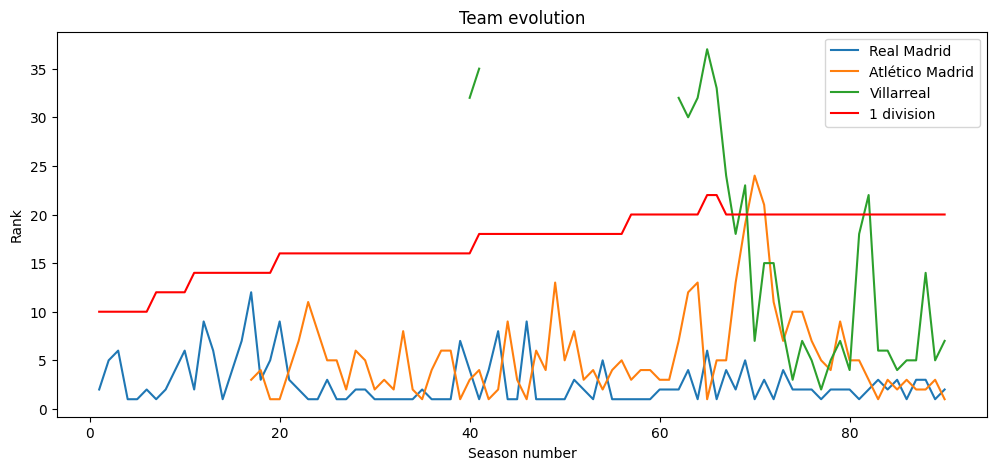

In [167]:
ranking_evolution("Real Madrid", "Atlético Madrid", "Villarreal")

### Exercise 9

##### In football jargon, those teams that are permanently descending and ascending between 1st and 2nd division are called elevator teams. What are the most elevator teams in LaLiga? Plot the history of the top 5 of them using the function from exercise 9.

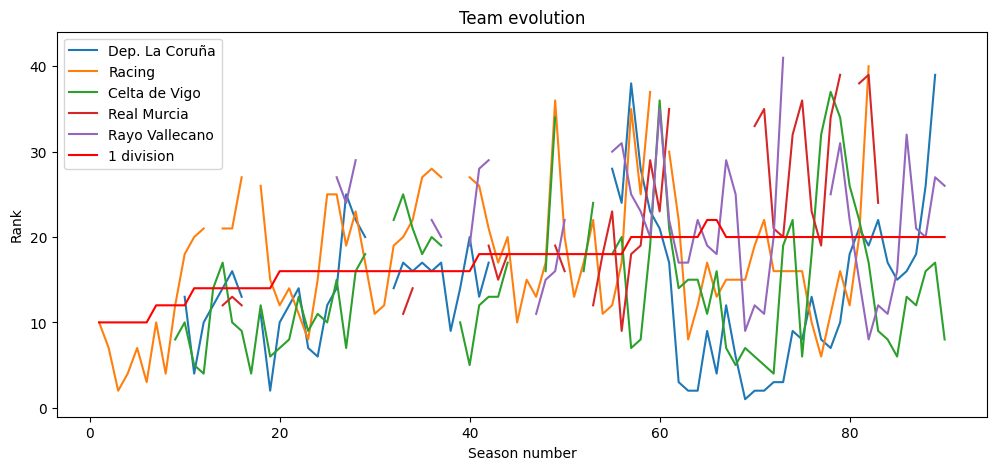

In [168]:
division_changes = (df_result.groupby(["team"])["division"]
                       .apply(lambda x: (x != x.shift()).sum())
                       .reset_index(name="changes"))

division_changes.sort_values("changes", ascending=False)
top_elevators = division_changes.sort_values("changes", ascending=False).head(5)
ranking_evolution(top_elevators["team"].tolist())

### Exercise 10

##### Create a table that is the same as the one in exercise 7, but not only with the season final standings, but the standings at the end of each matchday. Columns are the same, including matchday that tells about which match-day from the season these standings are from. Would you be able to add a new column last_5 with the result of last 5 matches? This column should contain a list like ["W", "L", "W", "T", "T"]. In this list, the first item is the immediate previous match, the second one is the match before this one, and so on. If there are no 5 previous matches (because matchday < 6, for instance) then just make the list shorter. Save the final table in Excel with the name MatchdayStandings.xlsx in the reports/ folder.

In [171]:
df_ranking = df

In [174]:
df_ranking = df_ranking.copy()
df_ranking["goals_home"] = df_ranking["goals_home"].fillna(0).astype(int)
df_ranking["goals_away"] = df_ranking["goals_away"].fillna(0).astype(int)

points_home = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "home_team", "matchday"])["result"].count() * 3
points_home.index = points_home.index.set_names("team", level="home_team")
points_tie1 = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "home_team", "matchday"])["result"].count()
points_tie1.index = points_tie1.index.set_names("team", level="home_team")
points_tie2 = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "away_team", "matchday"])["result"].count()
points_tie2.index = points_tie2.index.set_names("team", level="away_team")
points_visitor = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "away_team", "matchday"])["result"].count() * 3
points_visitor.index = points_visitor.index.set_names("team", level="away_team")
points0_home = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "home_team", "matchday"])["result"].count() * 0
points0_home.index = points0_home.index.set_names("team", level="home_team")
points0_visitor = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "away_team", "matchday"])["result"].count() * 0
points0_visitor.index = points0_visitor.index.set_names("team", level="away_team")

points = points_home.add(points_tie1, fill_value=0).add(points_tie2, fill_value=0).add(points_visitor, fill_value=0).add(points0_home, fill_value=0).add(points0_visitor, fill_value=0).astype(int)

loss_home = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "home_team", "matchday"])["result"].count()
loss_home.index = loss_home.index.set_names("team", level="home_team")
loss_visitor = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "away_team", "matchday"])["result"].count()
loss_visitor.index = loss_visitor.index.set_names("team", level="away_team")
loss = loss_home.add(loss_visitor, fill_value=0).astype(int)

win_home = df_ranking[df_ranking["result"] == "home"].groupby(["season", "division", "home_team", "matchday"])["result"].count()
win_home.index = win_home.index.set_names("team", level="home_team")
win_visitor = df_ranking[df_ranking["result"] == "visitor"].groupby(["season", "division", "away_team", "matchday"])["result"].count()
win_visitor.index = win_visitor.index.set_names("team", level="away_team")
win = win_home.add(win_visitor, fill_value=0).astype(int)

tie_home = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "home_team", "matchday"])["result"].count()
tie_home.index = tie_home.index.set_names("team", level="home_team")
tie_visitor = df_ranking[df_ranking["result"] == "tie"].groupby(["season", "division", "away_team", "matchday"])["result"].count()
tie_visitor.index = tie_visitor.index.set_names("team", level="away_team")
tie = tie_home.add(tie_visitor, fill_value=0)

goals_home = df_ranking.groupby(["season", "division", "home_team", "matchday"])["goals_home"].sum()
goals_home.index = goals_home.index.set_names("team", level="home_team")
goals_visitor = df_ranking.groupby(["season", "division", "away_team", "matchday"])["goals_away"].sum()
goals_visitor.index = goals_visitor.index.set_names("team", level="away_team")
GF = goals_home.add(goals_visitor, fill_value=0)

goals_home = df_ranking.groupby(["season", "division", "home_team", "matchday"])["goals_away"].sum()
goals_home.index = goals_home.index.set_names("team", level="home_team")
goals_visitor = df_ranking.groupby(["season", "division", "away_team", "matchday"])["goals_home"].sum()
goals_visitor.index = goals_visitor.index.set_names("team", level="away_team")
GA = goals_home.add(goals_visitor, fill_value=0)

GD = GF - GA

points = points.groupby(["season", "division", "team"]).cumsum()
GD = GD.groupby(["season", "division", "team"]).cumsum()
GF = GF.groupby(["season", "division", "team"]).cumsum()
GA = GA.groupby(["season", "division", "team"]).cumsum()

win2 = win.add(loss * 0, fill_value=0).add(tie * 0, fill_value=0).groupby(["season", "division", "team"]).cumsum().astype(int)
tie2 = tie.add(loss * 0, fill_value=0).add(win * 0, fill_value=0).groupby(["season", "division", "team"]).cumsum().astype(int)
loss2 = loss.add(tie * 0, fill_value=0).add(win * 0, fill_value=0).groupby(["season", "division", "team"]).cumsum().astype(int)

In [175]:
df_standings = pd.DataFrame({
    "GF": GF,
    "GA": GA,
    "GD": GD,
    "W": win2,
    "L": loss2,
    "T": tie2,
    "Pts": points
}).reset_index()

def add_ranking(df):
    df.insert(2, "rank", df["Pts"].rank(ascending=False, method="first"))
    return df
df_standings = df_standings.reset_index(drop=True).sort_values(["Pts", "GD", "GF"], ascending=[False, False, False]).reset_index(drop=True)
df_standings = df_standings.groupby(["season", "division", "matchday"]).apply(add_ranking).reset_index(drop=True).sort_values(["season", "division", "matchday"], ascending=[False, True, True]).reset_index(drop=True)

df_standings

,season,division,rank,team,matchday,GF,GA,GD,W,L,T,Pts
0,2021-2022,1,1.0,Real Madrid,1,4.0,1.0,3.0,1.0,0.0,0.0,3.0
1,2021-2022,1,2.0,Sevilla FC,1,3.0,0.0,3.0,1.0,0.0,0.0,3.0
2,2021-2022,1,3.0,Barcelona,1,4.0,2.0,2.0,1.0,0.0,0.0,3.0
3,2021-2022,1,4.0,Atlético Madrid,1,2.0,1.0,1.0,1.0,0.0,0.0,3.0
4,2021-2022,1,5.0,Valencia,1,1.0,0.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97549,1928-1929,1,6.0,Athletic Madrid,18,43.0,41.0,2.0,8.0,8.0,2.0,26.0
97550,1928-1929,1,7.0,Espanyol,18,32.0,38.0,-6.0,7.0,7.0,4.0,25.0
97551,1928-1929,1,8.0,Catalunya,18,45.0,49.0,-4.0,6.0,8.0,4.0,22.0
97552,1928-1929,1,9.0,Real Unión,18,40.0,42.0,-2.0,5.0,11.0,2.0,17.0


In [176]:
win_changes = df_standings.groupby(["season", "division", "team"])["W"].apply(lambda x: (x != x.shift().fillna(False)))
tie_changes = df_standings.groupby(["season", "division", "team"])["T"].apply(lambda x: (x != x.shift().fillna(False)))
loss_changes = df_standings.groupby(["season", "division", "team"])["L"].apply(lambda x: (x != x.shift().fillna(False)))

In [177]:
df_standings.loc[loss_changes.values == True, "last"] = "L"
df_standings.loc[tie_changes.values == True, "last"] = "T"
df_standings.loc[win_changes.values == True, "last"] = "W"

In [179]:
for i in range(5):
    df_standings[f"last_{i}"] = df_standings.groupby(['division','season' ,'team'])['last'].shift(i+1)


df_standings["last_5"] = df_standings[[f"last_{i}" for i in range(5)]].agg(lambda x: [i for i in x if not pd.isna(i)],axis=1)

In [180]:
df_standings = df_standings.sort_values(["season", "division", "matchday", "rank"], ascending = [False, True, True, True])

In [181]:
df_standings.loc[(df_standings["season"] == "2020-2021") & (df_standings["division"] == 1) & (df_standings["matchday"] == 25)]

,season,division,rank,team,matchday,GF,GA,GD,W,L,T,Pts,last,last_0,last_1,last_2,last_3,last_4,last_5
2164,2020-2021,1,1.0,Atlético Madrid,25,49.0,17.0,32.0,19.0,2.0,4.0,61.0,W,T,L,W,W,W,"[T, L, W, W, W]"
2165,2020-2021,1,2.0,Barcelona,25,55.0,22.0,33.0,16.0,4.0,5.0,53.0,L,W,L,W,W,T,"[W, L, W, W, T]"
2166,2020-2021,1,3.0,Real Madrid,25,43.0,20.0,23.0,16.0,4.0,5.0,53.0,L,W,W,L,T,W,"[W, W, L, T, W]"
2167,2020-2021,1,4.0,Sevilla FC,25,36.0,18.0,18.0,16.0,6.0,3.0,51.0,L,W,L,W,W,W,"[W, L, W, W, W]"
2168,2020-2021,1,5.0,Real Sociedad,25,42.0,21.0,21.0,11.0,5.0,9.0,42.0,L,L,W,W,W,T,"[L, W, W, W, T]"
2169,2020-2021,1,6.0,Real Betis,25,33.0,38.0,-5.0,12.0,10.0,3.0,39.0,T,W,L,W,W,W,"[W, L, W, W, W]"
2170,2020-2021,1,7.0,Villarreal,25,33.0,27.0,6.0,8.0,4.0,13.0,37.0,W,L,L,L,T,T,"[L, L, L, T, T]"
2171,2020-2021,1,8.0,Granada CF,25,31.0,42.0,-11.0,9.0,10.0,6.0,33.0,W,W,W,L,W,W,"[W, W, L, W, W]"
2172,2020-2021,1,9.0,Levante,25,35.0,34.0,1.0,7.0,7.0,11.0,32.0,L,T,L,L,W,W,"[T, L, L, W, W]"
2173,2020-2021,1,10.0,Athletic,25,35.0,30.0,5.0,8.0,11.0,6.0,30.0,T,L,L,W,W,W,"[L, L, W, W, W]"
